# Analyze and Clean Capstone 1 Project Datasets

In [1]:
# Import modules
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [2]:
# Path declarations.
strResults_Path = "M:/Code/Springboard/Capstone_Project_1/Capstone_Project_1/"
strEmpCount_Path = strResults_Path + "Parse_Results_2019-02-01.csv"
strStkPrice_Path = strResults_Path + "SPX_Prices_Tiingo_Financials_1990-2018.csv"

In [3]:
# Load datasets.
dfrEmpCount = pd.read_csv(strEmpCount_Path)
dfrStkPrice = pd.read_csv(strStkPrice_Path)

In [4]:
# Delete unwanted columns and and drop empty rows as they will not be of any use anyway.
dfrEmpCount = dfrEmpCount[["Symbol","RptYear","EmpCount"]].dropna()
dfrEmpCount.head(10)

,Symbol,RptYear,EmpCount
1,AMG,2017.0,4400.0
3,AMG,2016.0,4100.0
5,AMG,2015.0,3200.0
7,AMG,2014.0,2900.0
9,AMG,2013.0,2500.0
10,AMG,2012.0,2230.0
11,AMG,2011.0,2020.0
12,AMG,2010.0,1910.0
14,AMG,2009.0,1580.0
16,AMG,2008.0,1680.0


In [5]:
# Evaluate duplicates within the EmpCount dataset.
dfrDupes = dfrEmpCount[dfrEmpCount.duplicated(["Symbol","RptYear","EmpCount"], keep=False)]
print("Dataset EmpCount has %i rows and has %i duplicates." % (len(dfrEmpCount), len(dfrDupes)))
dfrDupes.head(6)

Dataset EmpCount has 1302 rows and has 87 duplicates.


,Symbol,RptYear,EmpCount
121,AIG,2008.0,116000.0
123,AIG,2008.0,116000.0
126,AIG,2005.0,97000.0
127,AIG,2005.0,97000.0
138,AIG,1995.0,34500.0
139,AIG,1995.0,34500.0


In [6]:
# Take care of complete duplicates and then look for multiple values for a given year due to 10-K amendment files.
dfrEmpCount = dfrEmpCount.drop_duplicates()
dfrEmpCount = dfrEmpCount.sort_values(by=["Symbol","RptYear","EmpCount"])
dfrDupes = dfrEmpCount[dfrEmpCount.duplicated(["Symbol","RptYear"], keep=False)]
print("Dataset EmpCount has %i rows and has %i duplicates." % (len(dfrEmpCount), len(dfrDupes)))
dfrDupes.head()

Dataset EmpCount has 1256 rows and has 43 duplicates.


,Symbol,RptYear,EmpCount
128,AIG,2005.0,92000.0
126,AIG,2005.0,97000.0
219,AIZ,2006.0,12000.0
218,AIZ,2006.0,13400.0
206,AIZ,2017.0,13600.0


In [7]:
# Since some duplicates exist, but with varying values, take the larger number as the smaller is likely subsidiaries.
dfrEmpCount = dfrEmpCount.drop_duplicates(["Symbol","RptYear"], keep="last")
dfrDupes = dfrEmpCount[dfrEmpCount.duplicated(["Symbol","RptYear"], keep=False)]
print("Dataset EmpCount has %i rows and has %i duplicates." % (len(dfrEmpCount), len(dfrDupes)))
dfrDupes.head()

Dataset EmpCount has 1234 rows and has 0 duplicates.


,Symbol,RptYear,EmpCount


In [8]:
# Pivot the table so it's easier to see the series of data for each item
dfrEmpCount = dfrEmpCount.pivot(index="Symbol", columns="RptYear", values="EmpCount")
dfrEmpCount.head(20)

RptYear,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Symbol,,,,,,,,,,,,,,,,,,,,,
AFL,3902.0,4000.0,4070.0,4066.0,4032.0,4450.0,4673.0,5278.0,5739.0,6086.0,...,8349.0,8211.0,8562.0,8965.0,9141.0,9525.0,9915.0,10212.0,11318.0,NaN
AIG,33000.0,32000.0,34500.0,36600.0,40000.0,48000.0,55000.0,61000.0,81000.0,80000.0,...,96000.0,63000.0,57000.0,63000.0,64000.0,65000.0,66400.0,66400.0,56400.0,NaN
AIZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15000.0,14000.0,14100.0,NaN,14600.0,16600.0,17600.0,16700.0,14700.0,NaN
AJG,NaN,3300.0,3700.0,3900.0,3900.0,4350.0,4600.0,5200.0,6500.0,7100.0,...,9900.0,10700.0,12400.0,13700.0,16400.0,20200.0,21500.0,24800.0,26800.0,NaN
ALL,NaN,NaN,NaN,48200.0,51400.0,53000.0,52000.0,41800.0,39627.0,39284.0,...,36000.0,35000.0,37000.0,38000.0,38800.0,39700.0,41100.0,43050.0,42460.0,NaN
AMG,NaN,NaN,NaN,NaN,311.0,429.0,596.0,666.0,795.0,849.0,...,1580.0,1910.0,2020.0,2230.0,2500.0,2900.0,3200.0,4100.0,4400.0,NaN
AMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9793.0,10472.0,11139.0,12235.0,12039.0,12209.0,13000.0,13000.0,13000.0,NaN
AON,NaN,18000.0,27000.0,28000.0,40000.0,44000.0,50000.0,51000.0,53000.0,55000.0,...,36200.0,59000.0,62000.0,65000.0,66000.0,69000.0,69000.0,69000.0,50000.0,NaN
AXP,64493.0,72412.0,70347.0,72300.0,73620.0,85000.0,88400.0,89000.0,84400.0,75500.0,...,58300.0,61000.0,62500.0,63500.0,62800.0,54000.0,54800.0,56400.0,55000.0,NaN


In [9]:
# Forward fill the data for missing items
dfrEmpCount = dfrEmpCount.fillna(method="ffill", axis="columns")
dfrEmpCount.head(20)

RptYear,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Symbol,,,,,,,,,,,,,,,,,,,,,
AFL,3902.0,4000.0,4070.0,4066.0,4032.0,4450.0,4673.0,5278.0,5739.0,6086.0,...,8349.0,8211.0,8562.0,8965.0,9141.0,9525.0,9915.0,10212.0,11318.0,11318.0
AIG,33000.0,32000.0,34500.0,36600.0,40000.0,48000.0,55000.0,61000.0,81000.0,80000.0,...,96000.0,63000.0,57000.0,63000.0,64000.0,65000.0,66400.0,66400.0,56400.0,56400.0
AIZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15000.0,14000.0,14100.0,14100.0,14600.0,16600.0,17600.0,16700.0,14700.0,14700.0
AJG,NaN,3300.0,3700.0,3900.0,3900.0,4350.0,4600.0,5200.0,6500.0,7100.0,...,9900.0,10700.0,12400.0,13700.0,16400.0,20200.0,21500.0,24800.0,26800.0,26800.0
ALL,NaN,NaN,NaN,48200.0,51400.0,53000.0,52000.0,41800.0,39627.0,39284.0,...,36000.0,35000.0,37000.0,38000.0,38800.0,39700.0,41100.0,43050.0,42460.0,42460.0
AMG,NaN,NaN,NaN,NaN,311.0,429.0,596.0,666.0,795.0,849.0,...,1580.0,1910.0,2020.0,2230.0,2500.0,2900.0,3200.0,4100.0,4400.0,4400.0
AMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9793.0,10472.0,11139.0,12235.0,12039.0,12209.0,13000.0,13000.0,13000.0,13000.0
AON,NaN,18000.0,27000.0,28000.0,40000.0,44000.0,50000.0,51000.0,53000.0,55000.0,...,36200.0,59000.0,62000.0,65000.0,66000.0,69000.0,69000.0,69000.0,50000.0,50000.0
AXP,64493.0,72412.0,70347.0,72300.0,73620.0,85000.0,88400.0,89000.0,84400.0,75500.0,...,58300.0,61000.0,62500.0,63500.0,62800.0,54000.0,54800.0,56400.0,55000.0,55000.0


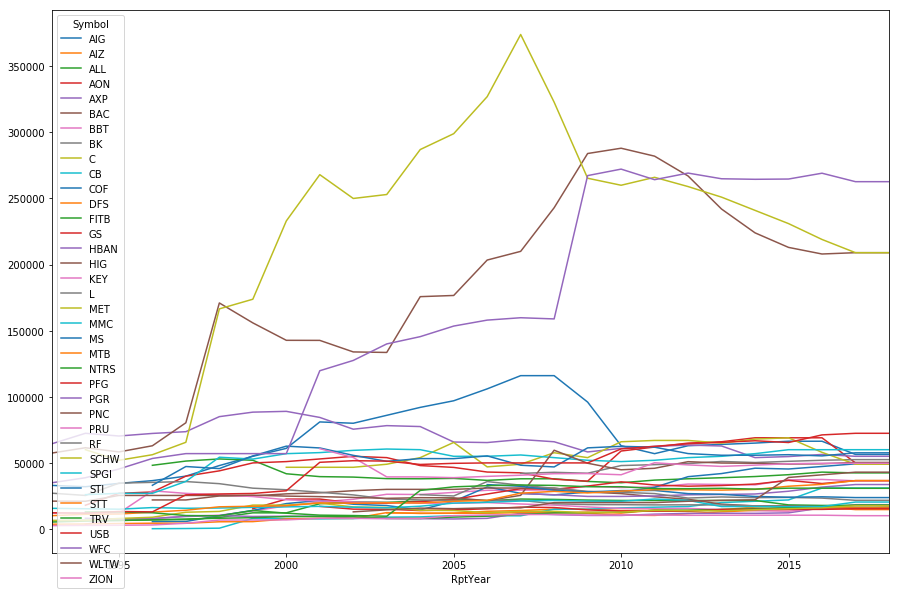

In [10]:
# Observe large shifts in employee counts for companies with larger than 100000 employees.
dfrEmpCount_t = dfrEmpCount[(dfrEmpCount[2009.0]>=10000) & (dfrEmpCount[2009.0]<500000)].transpose()
plt.figure(figsize=(20,10))
dfrEmpCount_t.plot()

In [11]:
dfrEmpCount.loc["BAC"]

RptYear
1993.0     57463.0
1994.0     61484.0
1995.0     58322.0
1996.0     62971.0
1997.0     80360.0
1998.0    170975.0
1999.0    155906.0
2000.0    142724.0
2001.0    142670.0
2002.0    133944.0
2003.0    133549.0
2004.0    175742.0
2005.0    176638.0
2006.0    203425.0
2007.0    210000.0
2008.0    243000.0
2009.0    284000.0
2010.0    288000.0
2011.0    282000.0
2012.0    267000.0
2013.0    242000.0
2014.0    224000.0
2015.0    213000.0
2016.0    208000.0
2017.0    209000.0
2018.0    209000.0
Name: BAC, dtype: float64

In [12]:
# Save to a local file for later analysis
dfrEmpCount.to_csv(strResults_Path + "EmployeeCount_2018.csv")

In [13]:
# Analyze stock price tickers
dfrStkPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 69 columns):
date     5310 non-null object
AMG      5310 non-null float64
AFL      5310 non-null float64
ALL      5310 non-null float64
AXP      5310 non-null float64
AIG      5310 non-null float64
AMP      3346 non-null float64
AON      5310 non-null float64
AJG      5310 non-null float64
AIZ      3752 non-null float64
BAC      5310 non-null float64
BK       5310 non-null float64
BBT      5310 non-null float64
BRK-B    5310 non-null float64
BLK      4843 non-null float64
BHF      2070 non-null float64
COF      5310 non-null float64
CBOE     2152 non-null float64
SCHW     5310 non-null float64
CB       5310 non-null float64
CINF     5310 non-null float64
C        5310 non-null float64
CFG      1075 non-null float64
CME      4044 non-null float64
CMA      5310 non-null float64
DFS      2908 non-null float64
ETFC     5310 non-null float64
RE       5310 non-null float64
FITB     5310 non-null flo

In [14]:
# Several missing pieces of datapoints, so best to forward fill the missing points and leave the earlier blacnk ones.
dfrStkPrice["date"] = pd.to_datetime(dfrStkPrice["date"])
dfrStkPrice = dfrStkPrice.set_index("date").sort_index()
dfrStkPrice = dfrStkPrice.fillna(method="ffill", axis="index")

,AMG,AFL,ALL,AXP,AIG,AMP,AON,AJG,AIZ,BAC,...,SIVB,SYF,TROW,TMK,TRV,USB,UNM,WFC,WLTW,ZION
date,,,,,,,,,,,,,,,,,,,,,
1997-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,1030.318196,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN,1411.639445,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,NaN,NaN,NaN,NaN,1139.408723,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,NaN,NaN,NaN,NaN,832.442990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,NaN,NaN,NaN,NaN,957.531974,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,NaN,NaN,NaN,NaN,952.498173,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,NaN,NaN,NaN,NaN,998.505561,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


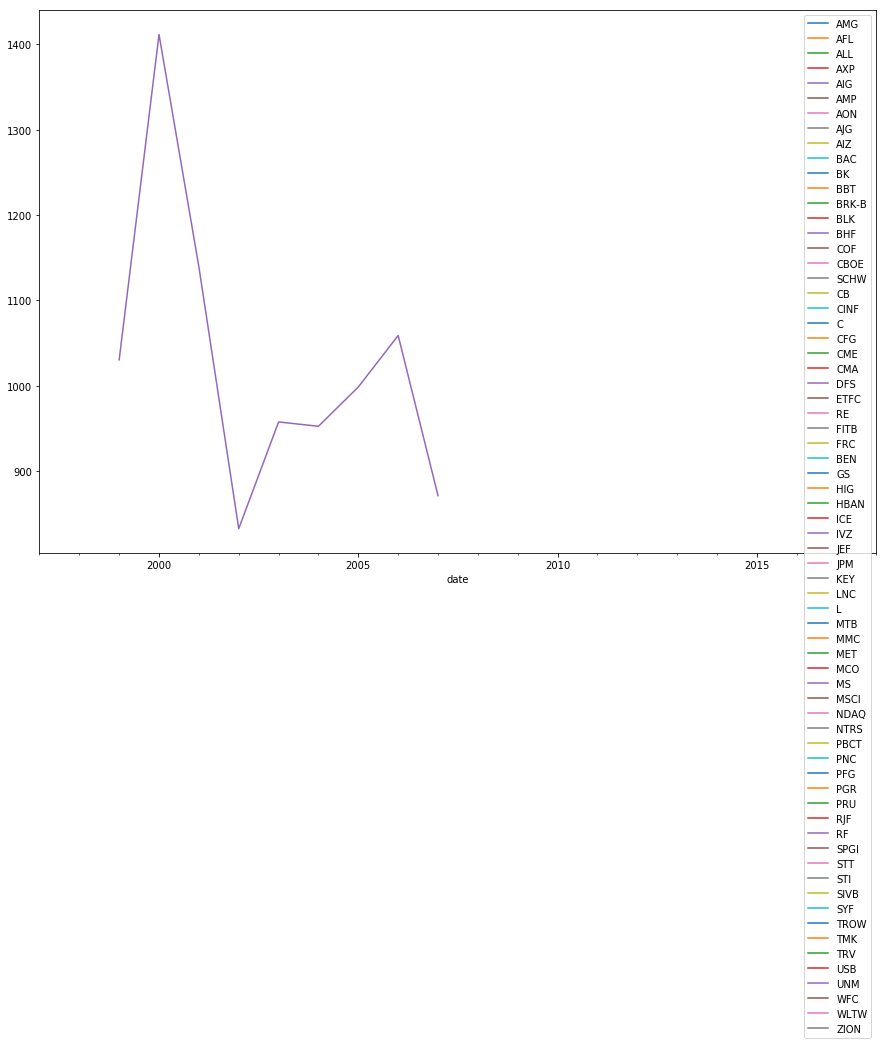

In [15]:
# Observe large shifts in stock price for companies but unlikely as the data provider, Tiingo, would clean them.
dfrStkPrice_t = dfrStkPrice.resample("A").last()
dfrStkPrice_t = dfrStkPrice_t[dfrStkPrice_t > 800]
plt.figure(figsize=(20,10))
dfrStkPrice_t.plot()
dfrStkPrice_t.head(20)

In [16]:
# Save to a local file for later analysis
dfrStkPrice_t.to_csv(strResults_Path + "StkPrice_2018.csv")